In [507]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# import libraries

**Read Dataset**


In [508]:
rest = pd.read_csv('/home/mayank-rajoriya/Desktop/Internship_project/Dataset .csv')
rest['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

rest_csv.tail(10)

In [509]:
rest

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [510]:
rest.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [511]:
rest['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [512]:
rest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Treating outliers of target variable**

In [513]:
rest['Aggregate rating'].describe()


count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [514]:
q1= 2.500000
q3= 3.700000
IQR = 1.2
lowe_limit = q1 - 1.5* IQR
upper_limit = q3 + 1.5*IQR
print(f"upper limit is {upper_limit} and lower limit is {lowe_limit}")

upper limit is 5.5 and lower limit is 0.7000000000000002


In [515]:
upper_limit = max(rest['Aggregate rating'])
print(upper_limit)

4.9


**Wisker plot graph**

<Axes: xlabel='Aggregate rating'>

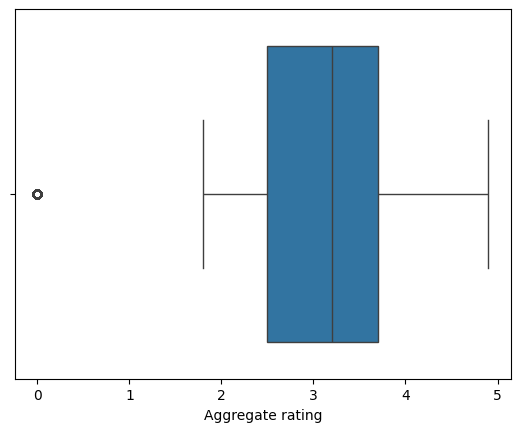

In [516]:
import seaborn as sns
sns.boxplot(x=rest['Aggregate rating'])

In [517]:
outliers = rest[(rest['Aggregate rating']< lowe_limit) | (rest['Aggregate rating']> upper_limit)]
print(outliers)

      Restaurant ID         Restaurant Name  Country Code            City  \
30          6600060          Sandubas Caf��            30       Bras�_lia   
58          7305048   Quiosque Chopp Brahma            30  Rio de Janeiro   
69          6710645        Cantinho da Gula            30      S��o Paulo   
77          6701419           Divino Fog��o            30      S��o Paulo   
78          6703956             Super Grill            30      S��o Paulo   
...             ...                     ...           ...             ...   
9109       18277023           Bread & Pasta             1           Noida   
9110       18313203           Chillies Cafe             1           Noida   
9111       18254559                Platters             1           Noida   
9112       18255132               The Grand             1           Noida   
9351       18273002  Damascena Coffee House           215      Birmingham   

                                                Address  \
30    Edif�_cio 

In [518]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    elif value< lowe_limit:
        return lowe_limit
    else:
        return value

rest['Aggregate rating']= rest['Aggregate rating'].apply(limit_imputer)


In [519]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [520]:
outliers = rest[(rest['Aggregate rating'] < lowe_limit) | (rest['Aggregate rating'] > upper_limit)]
print(outliers)
# succefully removed outliers in target variable

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]


**Missing values spoted in variable cusins**

Variable **Cusines** is object 

In [521]:
rest['Cuisines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9551 entries, 0 to 9550
Series name: Cuisines
Non-Null Count  Dtype 
--------------  ----- 
9542 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


In [522]:
print(rest['Cuisines'])
missing_values = rest['Cuisines'].isnull()
if missing_values.any():
    print("There are missing values in the 'Cuisines' column.")

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object
There are missing values in the 'Cuisines' column.


In [523]:
# delete missing values
for Missing in rest['Cuisines']:
    if pd.isnull(Missing):
        rest.dropna(inplace=True)

rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

**Preprocess The Data Encoding Categorical Variable**

In [524]:
rest.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [525]:
rest.drop(['Restaurant ID', 'Address','Locality Verbose', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','City', 'Country Code' ] , axis=1, inplace=True)

rest.drop(['Restaurant Name', 'Rating color'], axis=1, inplace=True)
rest.drop('Locality', axis=1, inplace=True)



In [526]:
rest['Has Table booking'] = rest['Has Table booking'].map({'Yes': 1, 'No': 0})


In [527]:
rest['Rating text'].unique()
rest.drop(['Rating text'], axis=1, inplace=True)


Finding outliers

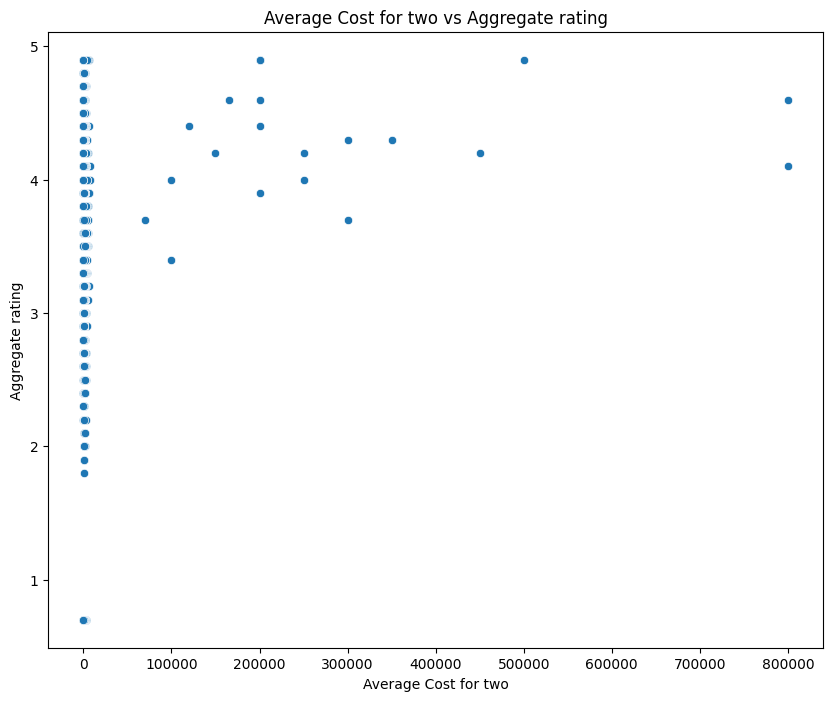

In [528]:

plt.figure(figsize=(10,8))
sns.scatterplot(x=rest['Average Cost for two'], y=rest['Aggregate rating'], data=rest)
plt.title('Average Cost for two vs Aggregate rating')
plt.show()

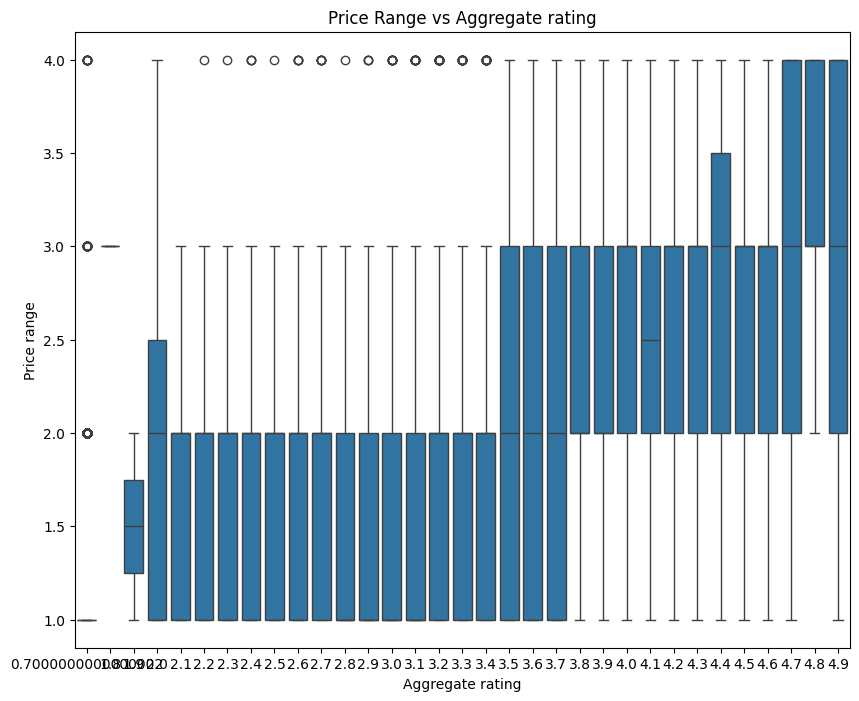

In [529]:
# compairing Aggregate rating and price range

plt.figure(figsize=(10,8))
sns.boxplot(x=rest['Aggregate rating'], y=rest['Price range'], data=rest)
plt.title('Price Range vs Aggregate rating')
plt.show()

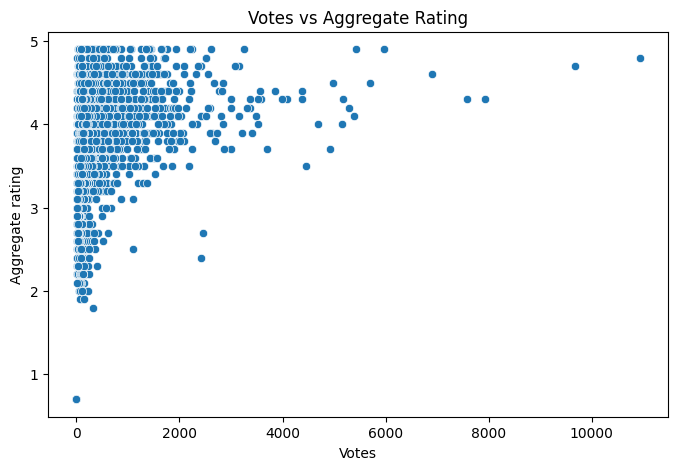

In [530]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=rest)
plt.title("Votes vs Aggregate Rating")
plt.show()


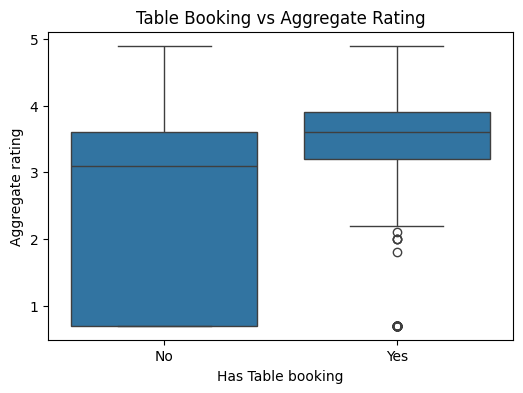

In [531]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=rest)
plt.title("Table Booking vs Aggregate Rating")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


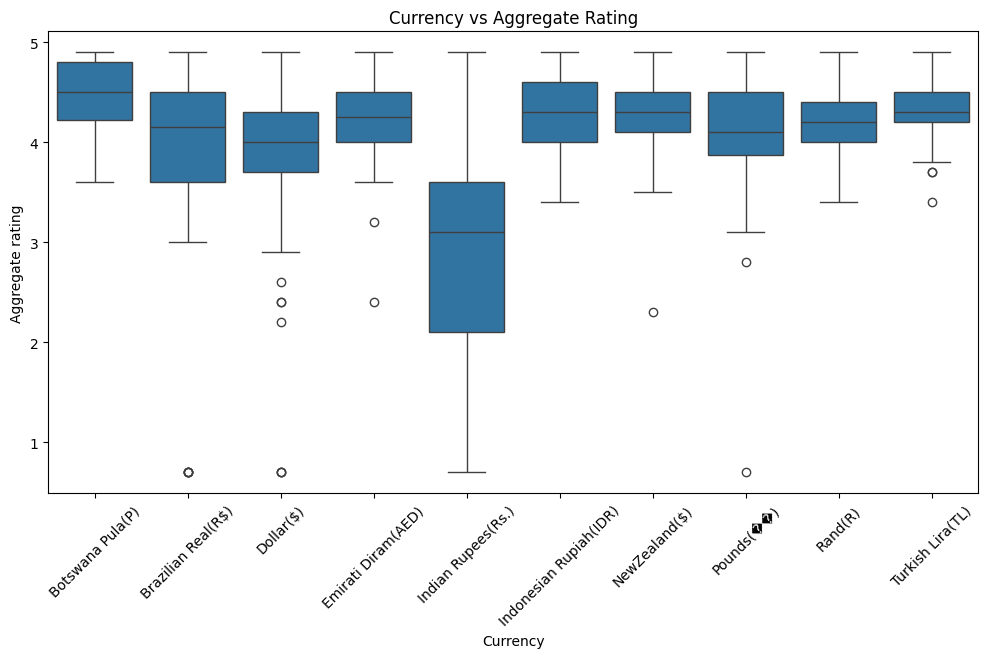

In [532]:
top_currencies = rest['Currency'].value_counts().nlargest(10).index
subset = rest[rest['Currency'].isin(top_currencies)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Currency', y='Aggregate rating', data=subset)
plt.xticks(rotation=45)
plt.title("Currency vs Aggregate Rating")
plt.show()


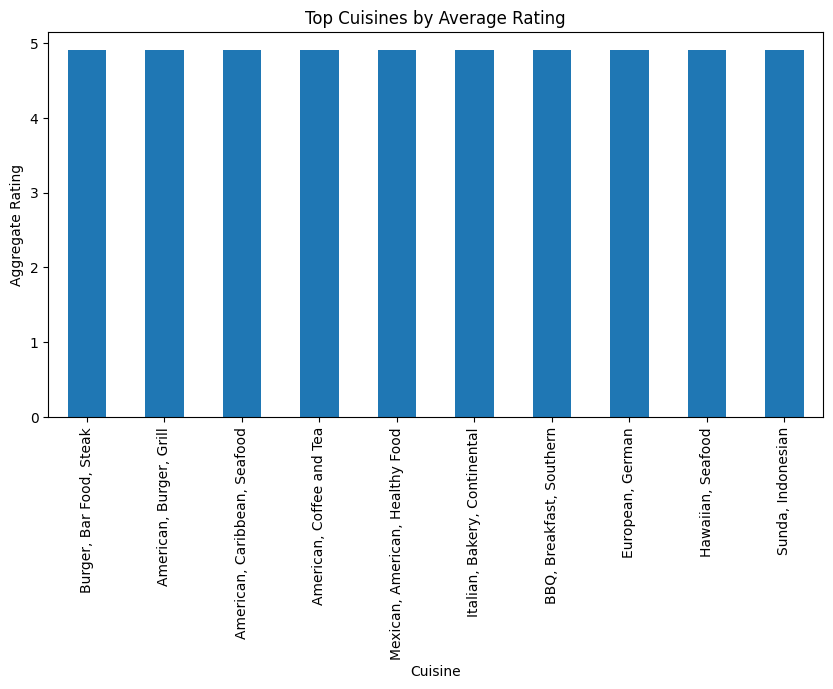

In [533]:
rest.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top Cuisines by Average Rating")
plt.ylabel("Aggregate Rating")
plt.xlabel("Cuisine")
plt.show()


In [534]:

q99 = rest['Average Cost for two'].quantile(0.99)
rest['Average Cost for two'] = rest['Average Cost for two'].apply(lambda x: q99 if x > q99 else x)


In [535]:
q99_votes = rest['Votes'].quantile(0.99)
rest['Votes'] = rest['Votes'].apply(lambda x: q99_votes if x > q99_votes else x)


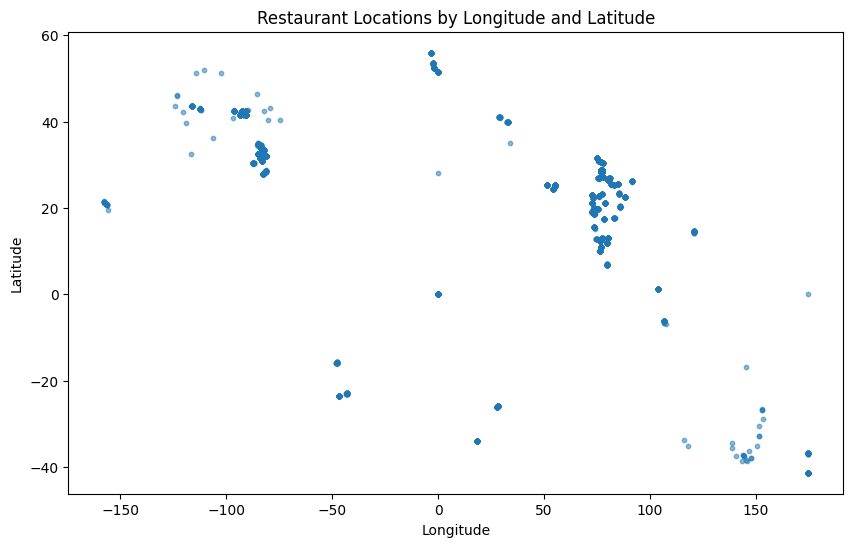

In [536]:

plt.figure(figsize=(10, 6))
plt.scatter(rest['Longitude'], rest['Latitude'], alpha=0.5, s=10)
plt.title("Restaurant Locations by Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [537]:


rest['Currency'] = rest['Currency'].map( {'Botswana Pula(P)':1, 'Brazilian Real(R$)' : 2, 'Dollar($)' :3,
       'Emirati Diram(AED)':4, 'Indian Rupees(Rs.)' : 5,
       'Indonesian Rupiah(IDR)' : 6, 'NewZealand($)':7, 'Pounds(��)':8,
       'Qatari Rial(QR)' :9, 'Rand(R)':10, 'Sri Lankan Rupee(LKR)': 11,
       'Turkish Lira(TL)': 0})

In [538]:
rest['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      shape=(1825,), dtype=object)

In [539]:
rest['Cuisines'] = rest['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rest['Cuisines'] = le.fit_transform(rest['Cuisines'])
rest['Cuisines'].unique()



array([ 39,  55,  97,  27,   6,  35,  37,   2,  61,  23,  54,  36,  12,
        18,  87,   4,  13,  69,  52,  86,  33,  56,  15,  63,  21, 104,
        50, 107,  11,  42,  28, 101,  19,  95,  40, 116, 112,  72,  62,
        68, 110,  43, 102,  46,  53,  77,  25,  24,  89, 109,  98, 117,
        38,  20,  31,   9, 114,  81,  30,  41, 100,   1,  79,  90,  74,
        49, 105,  71,  65,  73,  17,  82,  92,  57,  99,  85,  14,  47,
        88,  22,  10, 113,  34,  64,  45,  78,  80,  48,  16,   0,  59,
       111,   3,  67,  32,  66,   8,  70,  76,  75,  94,  26,  84, 106,
        51,   7, 108,  60,  29,  96,  91,   5,  44, 103,  58,  83, 118,
       115,  93])

In [540]:
rest

,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Price range,Aggregate rating,Votes
0,121.027535,14.565443,39,1100.0,1,1,3,4.8,314.0
1,121.014101,14.553708,55,1200.0,1,1,3,4.5,591.0
2,121.056831,14.581404,97,3418.0,1,1,4,4.4,270.0
3,121.056475,14.585318,55,1500.0,1,0,4,4.9,365.0
4,121.057508,14.584450,55,1500.0,1,1,4,4.8,229.0
...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,114,80.0,0,0,3,4.1,788.0
9547,29.041297,41.009847,118,105.0,0,0,3,4.2,1034.0
9548,29.034640,41.055817,54,170.0,0,0,4,3.7,661.0
9549,29.036019,41.057979,93,120.0,0,0,4,4.0,901.0


**Split the dataset & Train the model**

In [541]:
x = rest.drop(['Aggregate rating'], axis=1)
y = rest['Aggregate rating']
# split the dataset & Train the model


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [542]:



# Create model
DTR = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model
DTR.fit(x_train, y_train)

# Predict
y_pred = DTR.predict(x_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"R² Score of {DTR}:", r2)


R² Score of DecisionTreeRegressor(max_depth=5, random_state=42): 0.9270519662318057


In [543]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(DTR, x, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


Cross-validated R² scores: [0.86808752 0.9012467  0.940089   0.92866883 0.92293579]
Mean CV R²: 0.9122055699069357


In [544]:
import joblib
joblib.dump(DTR, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

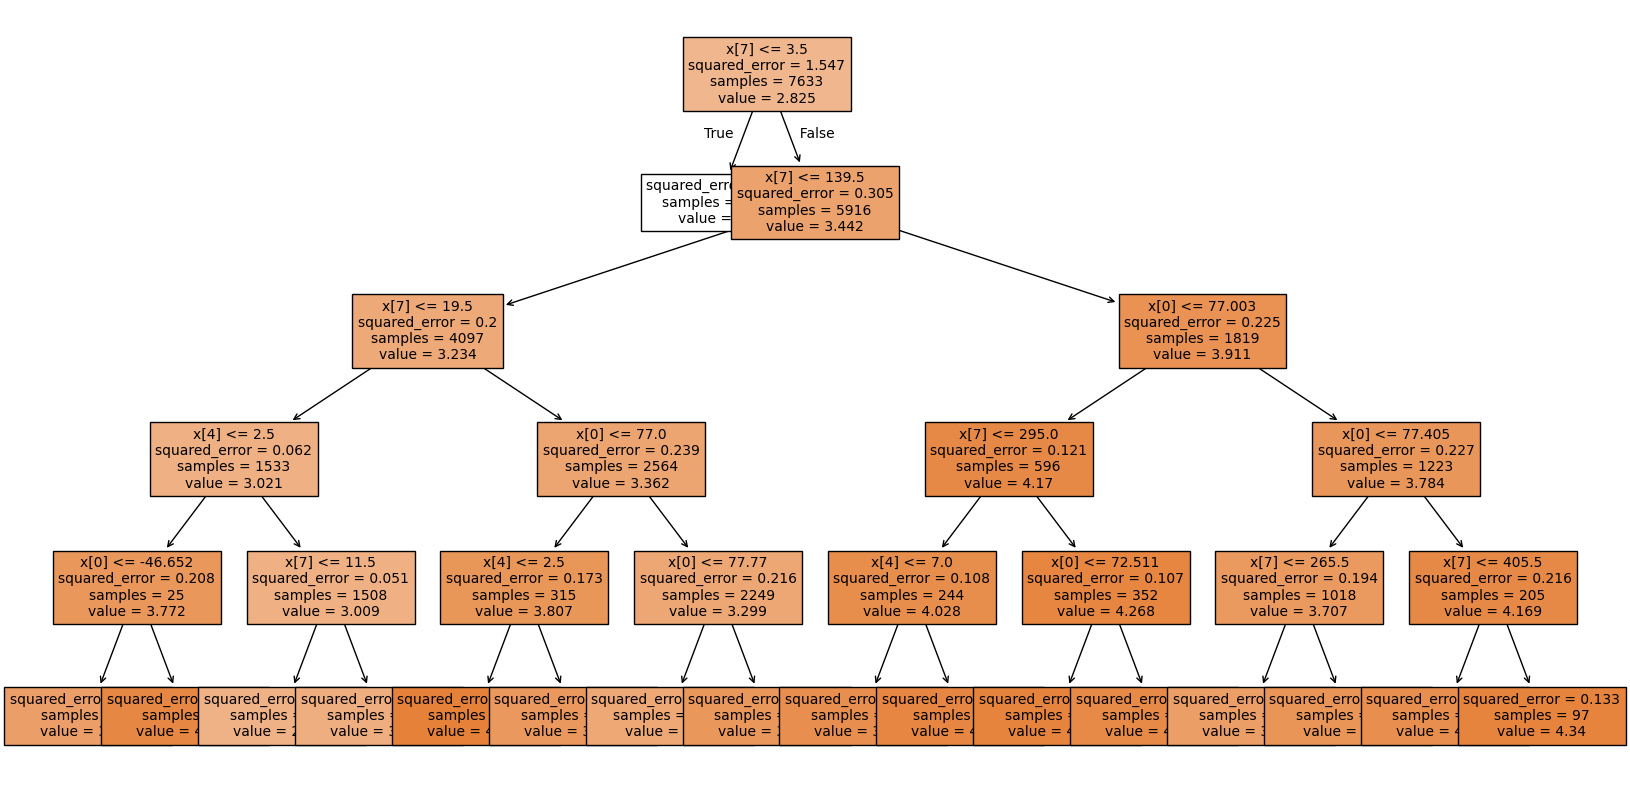

In [545]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(DTR, filled=True, fontsize=10)
plt.show()


**Feature analysis**

In [546]:


importance = pd.Series(DTR.feature_importances_, index=x.columns)

importance_sort = importance.sort_values(ascending=False)
print(importance_sort.head(9))


Votes                   0.978830
Longitude               0.018434
Currency                0.002736
Latitude                0.000000
Average Cost for two    0.000000
Cuisines                0.000000
Has Table booking       0.000000
Price range             0.000000
dtype: float64


Feature of model: 
**Votes                   0.864725** ,
 ,
**Latitude                0.000368** , 
**Cuisines                0.000077** ,
**Average Cost for two    0.000070** ,
**Longitude               0.000049**
**

**Test the model**

In [549]:

rest_prediction_model = joblib.load('/home/mayank-rajoriya/Desktop/Internship_project/decision_tree_model.pkl')

import pandas as pd
sample_input = pd.DataFrame([{
    'Longitude': 121.027535,
    'Latitude': 14.565443,
    'Cuisines': 39,
    'Average Cost for two': 12100.0,
    'Currency': 1,
    'Has Table booking': 0,
    'Price range': 3,
    'Votes': 314.0
}])
# # Votes                   0.864725

# Latitude                0.000368
# Cuisines                0.000077
# Average Cost for two    0.000070
# Longitude               0.000049
# Currency                0.000000
# Price range             0.000000
# Has Table booking       0.000000


rating_prediction = rest_prediction_model.predict(sample_input)
print("Predicted Aggregate Rating:", rating_prediction[0])



Predicted Aggregate Rating: 4.014814814814812


In [548]:
Cleaned_Data = rest
Cleaned_Data

,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Price range,Aggregate rating,Votes
0,121.027535,14.565443,39,1100.0,1,1,3,4.8,314.0
1,121.014101,14.553708,55,1200.0,1,1,3,4.5,591.0
2,121.056831,14.581404,97,3418.0,1,1,4,4.4,270.0
3,121.056475,14.585318,55,1500.0,1,0,4,4.9,365.0
4,121.057508,14.584450,55,1500.0,1,1,4,4.8,229.0
...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,114,80.0,0,0,3,4.1,788.0
9547,29.041297,41.009847,118,105.0,0,0,3,4.2,1034.0
9548,29.034640,41.055817,54,170.0,0,0,4,3.7,661.0
9549,29.036019,41.057979,93,120.0,0,0,4,4.0,901.0
